In [1]:
import phoebe
import numpy as np
import matplotlib.pyplot as plt
import emcee
import sys
%matplotlib inline

In [2]:
logger = phoebe.logger()

In [3]:
b = phoebe.default_binary()

In [4]:
b.add_constraint('semidetached', 'primary')

<ParameterSet: 1 parameters>

In [5]:
b.add_constraint('semidetached', 'secondary')

<ParameterSet: 1 parameters>

In [6]:
b['period@orbit'] = 1
b['sma@orbit'] = 3.5

b['q@binary'] = 0.4051
b['incl@binary'] = 78.48
#b['requiv@primary'] = 1.73
#b['requiv@secondary'] = 1.4
b['teff@primary'] = 5660.
b['teff@secondary'] = 5653.

In [7]:
times = np.linspace(0, 1, 150)
b.add_dataset('lc', times=times, passband='Johnson:B')

<ParameterSet: 78 parameters | contexts: figure, compute, dataset, constraint>

In [8]:
b.run_compute()

100%|██████████| 150/150 [00:04<00:00, 30.36it/s]


<ParameterSet: 3 parameters | qualifiers: fluxes, times, comments>

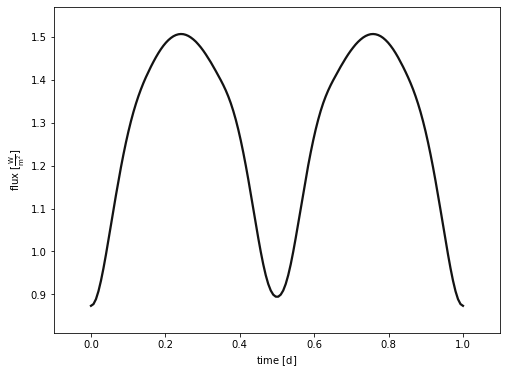

(<autofig.figure.Figure | 1 axes | 1 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [9]:
b.plot(show=True)

In [10]:
phases = b.to_phase(times)
phases_sorted = sorted(phases)
flux = b['fluxes@model'].interp_value(phases=phases_sorted)

In [11]:
ls

adddata.py  dxcode.ipynb   licurdata.ipynb  v737per.B
data.lc     funcfit.ipynb  mcmclc.ipynb     未命名.ipynb


In [12]:
v737 = np.loadtxt('v737per.B')

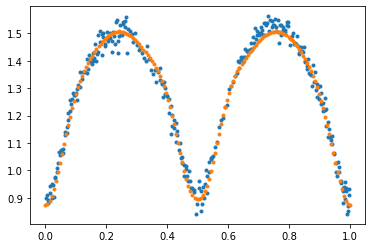

In [19]:
vdata = v737[:,1]
flux = vdata/(-2.5)
flux10 = 10**flux
plt.plot(v737[:,0], flux10+0.05, '.')
#plt.plot(v737[:,0], -vdata+1.08, '.') #b['value@times@lc01@model']
#plt.plot(phases_sorted,flux,'.')
#ax = plt.gca()
#ax.yaxis.set_ticks_position('left') #将y轴的位置设置在右边
#ax.invert_yaxis() #y轴反向

plt.plot(b['value@times@lc01@model'], b['value@fluxes@lc01@model'], '.') 

In [20]:
print(b.filter(context='component'))

ParameterSet: 59 parameters
C        requiv@primary@component: 1.613378415785907 solRad
C    requiv_max@primary@component: 1.613378415785907 solRad
           teff@primary@component: 5660.0 K
           abun@primary@component: 0.0
C          logg@primary@component: 3.6347786786293703
        syncpar@primary@component: 1.0
C        period@primary@component: 1.0 d
C          freq@primary@component: 6.283185 rad / d
          pitch@primary@component: 0.0 deg
            yaw@primary@component: 0.0 deg
C          incl@primary@component: 78.48 deg
C       long_an@primary@component: 0.0 deg
      gravb_bol@primary@component: 0.32
   irrad_frac_refl_bol@primary...: 0.6
C  irrad_frac_lost_bol@primary...: 0.4
    ld_mode_bol@primary@component: lookup
    ld_func_bol@primary@component: logarithmic
   ld_coeffs_source_bol@primar...: auto
C          mass@primary@component: 0.40943364850360536 solMass
C      requiv@secondary@component: 1.0626933697939192 solRad
C  requiv_max@secondary@component: 1.0